# 1. Data understanding and Preprocessing

* Load the dataset and provide a summary of its structure (number of rows, columns, data types, and missing values).
* Perform data cleaning:
    * Handle missing values appropriately.
    * Convert data types if necessary.
    * Create any new features you think might be useful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  ---------------------------------------------------Importing the Dataset------------------------------------------------------------------

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### `Cleaning the dataset`

<b> Value count of dtypes.

In [4]:
df.dtypes.value_counts()

int64      16
object     12
float64     4
Name: count, dtype: int64

<b>Missing values

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## -----------------------------------------------------------------------------------------
## Summary of the DataFrame:

#### Summary of DataFrame

- **Number of Rows:** 119,390
- **Number of Columns:** 32

#### Data Types

- **Integer Columns (`int64`):** 16 columns  
- **Float Columns (`float64`):** 4 columns  
- **Object Columns (`object`):** 12 columns  

#### Missing Values

- **`children`**: 4 missing values  
- **`country`**: 488 missing values  
- **`agent`**: 16,340 missing values  
- **`company`**: 112,593 missing values  

This summary provides an overview of the structure and missing data within your DataFrame, helping to identify areas that may require data cleaning or handling.

### Columns with missing values:
* children - <b>4</b>

* country - <b>488</b>

* agent - <b>16340</b>

* company - <b>112593</b>

### -------------------------------------------------Handling missing values------------------------------------------------------------------

#### Handling missing values in "children" column

In [6]:
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

**`Note:-`** Since there are only <b>4</b> missing values in the <b>"children"</b> column. We will replace it with the <b>"0"</b> as it has the highest occurence in this column.

In [7]:
df['children'] = df['children'].fillna(0.0)

In [8]:
df['children'].value_counts()

children
0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

#### Handling missing values in "country" column

In [9]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [10]:
df['country'].isnull().sum()

488

**`Note:-`** Since <b>"country"</b> column has <b>488</b> missing values and these are all categorical values.
* We will replace the null values with <b>"unknown"</b>.
* We will not replace the null values with "PRT" (i.e. the category with highest occurence) because this can affect the outcome while training the model.

In [11]:
df['country'].fillna("unknown", inplace=True)

In [12]:
df['country'].isnull().sum()

0

In [13]:
label = df['country'].value_counts().keys()
size = df['country'].value_counts().values

Text(0, 0.5, 'Value')

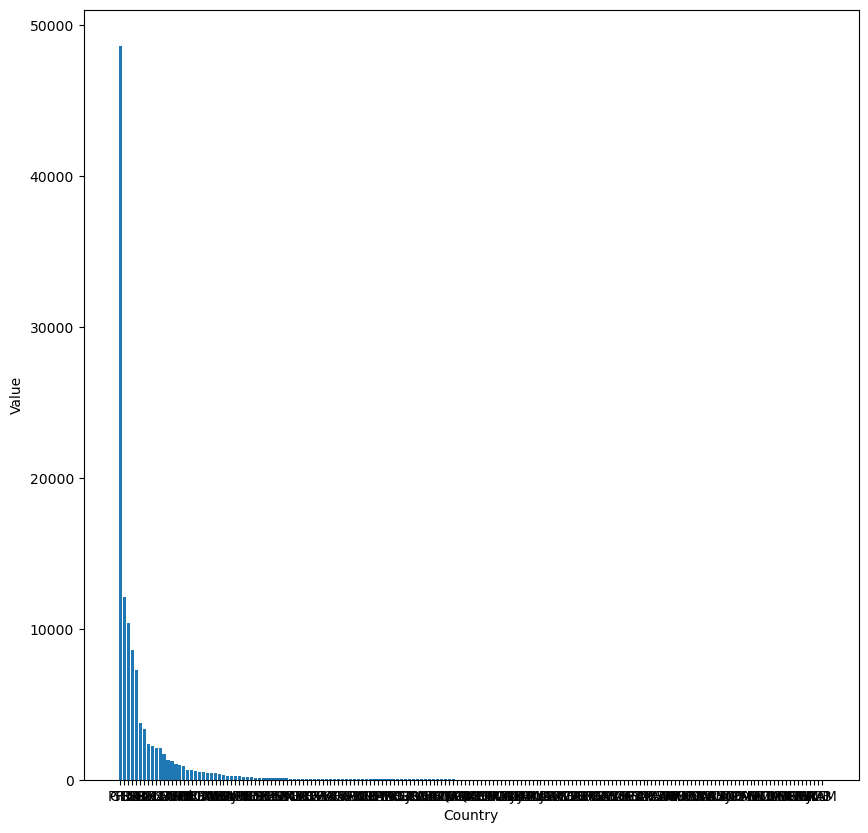

In [14]:
plt.figure(figsize=(10,10))
plt.bar(label, size)

plt.xlabel('Country')
plt.ylabel('Value')

**`Note:-`** Since "country" column have more than 100 categories. We will consider top 10 countries with the most number of occurences and rename rest of the countries as "others"

In [15]:
top_10_countries = df['country'].value_counts().keys()[:10]

In [16]:
top_10_countries

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD'], dtype='object', name='country')

In [17]:
df['country'] = df['country'].apply(lambda x: x if x in top_10_countries else 'Others')

In [18]:
df['country'].value_counts()

country
PRT       48590
Others    18590
GBR       12129
FRA       10415
ESP        8568
DEU        7287
ITA        3766
IRL        3375
BEL        2342
BRA        2224
NLD        2104
Name: count, dtype: int64

In [19]:
label = df['country'].value_counts().keys()
size = df['country'].value_counts().values

Text(0, 0.5, 'Value')

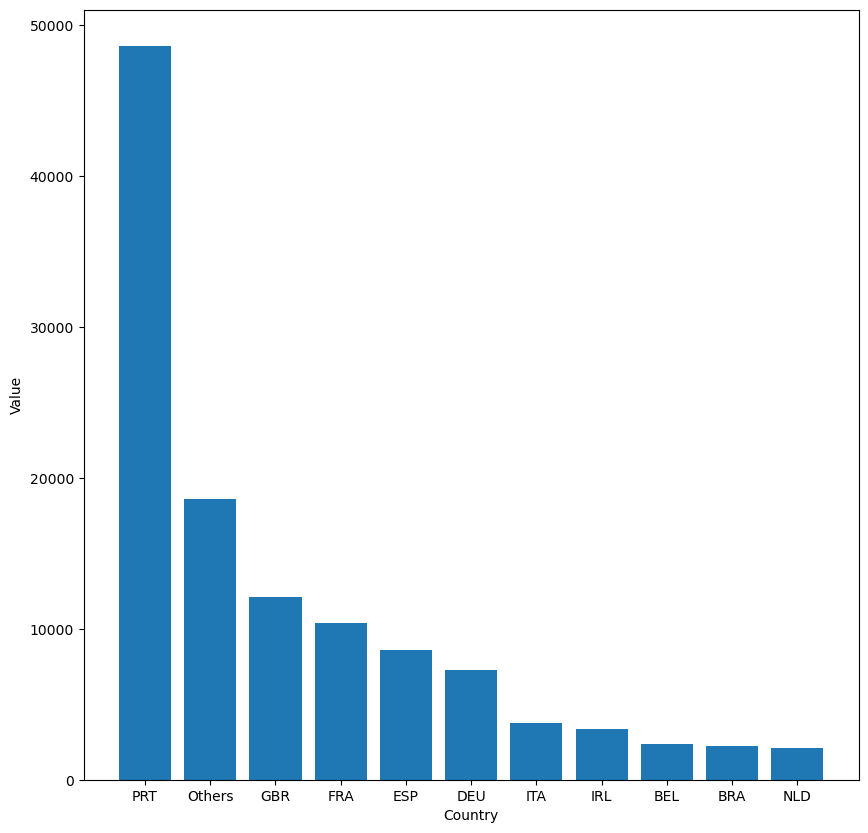

In [20]:
plt.figure(figsize=(10,10))
plt.bar(label, size)

plt.xlabel('Country')
plt.ylabel('Value')

#### Handling the missing values in "agent" column

In [21]:
print("column 'agent' has",df['agent'].isna().sum(), "missing values")

column 'agent' has 16340 missing values


In [22]:
df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

**`Note:-`** Since, column <b>"agent"</b> is an "int" datatype.
* We will replace the missing values with the <b>mean</b> because there are <b>16340</b> missing values which is a high number.


In [23]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [24]:
mean_of_agent = np.mean(df['agent'])

In [25]:
df['agent'].fillna(mean_of_agent, inplace=True)

#### Handling the missing values in "company" column

In [26]:
df['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

In [27]:
print("column 'company' has",df['company'].isna().sum(), "missing values")

column 'company' has 112593 missing values


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**`Note:-`** Since there is a very high occurences of missing values.
* Replacing the missing values with "mean" or with any other value is not a good options as it can impact the predictions negatively.
* Therefore, we will remove this column as it does not contain important information

In [29]:
df.drop('company', axis=1, inplace=True)

In [30]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### ---------------------------------------------Handling Categorical Values----------------------------------------------------------------

In [31]:
df.dtypes.value_counts()

int64      16
object     12
float64     3
Name: count, dtype: int64

In [32]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


#### Now, getting the information of categories from these columns

In [33]:
for cat_cols in categorical_columns:
    print(df[cat_cols].value_counts())
    print("-------------------------------")

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
-------------------------------
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
-------------------------------
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
-------------------------------
country
PRT       48590
Others    18590
GBR       12129
FRA       10415
ESP        8568
DEU        7287
ITA        3766
IRL        3375
BEL        2342
BRA        2224
NLD        2104
Name: count, dtype: int64
-------------------------------
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined  

Here’s a summary of each categorical column and its distribution:

#### 1. **hotel**
- **City Hotel**: 79,330 bookings
- **Resort Hotel**: 40,060 bookings

#### 2. **arrival_date_month**
- **August**: 13,877 bookings
- **July**: 12,661 bookings
- **May**: 11,791 bookings
- **October**: 11,160 bookings
- **April**: 11,089 bookings
- **June**: 10,939 bookings
- **September**: 10,508 bookings
- **March**: 9,794 bookings
- **February**: 8,068 bookings
- **November**: 6,794 bookings
- **December**: 6,780 bookings
- **January**: 5,929 bookings

#### 3. **meal**
- **BB (Bed & Breakfast)**: 92,310 bookings
- **HB (Half Board)**: 14,463 bookings
- **SC (Self Catering)**: 10,650 bookings
- **Undefined**: 1,169 bookings
- **FB (Full Board)**: 798 bookings

#### 4. **country**
- **PRT (Portugal)**: 48,590 bookings
- **Others**: 18,590 bookings
- **GBR (United Kingdom)**: 12,129 bookings
- **FRA (France)**: 10,415 bookings
- **ESP (Spain)**: 8,568 bookings
- **DEU (Germany)**: 7,287 bookings
- **ITA (Italy)**: 3,766 bookings
- **IRL (Ireland)**: 3,375 bookings
- **BEL (Belgium)**: 2,342 bookings
- **BRA (Brazil)**: 2,224 bookings
- **NLD (Netherlands)**: 2,104 bookings

#### 5. **market_segment**
- **Online TA**: 56,477 bookings
- **Offline TA/TO**: 24,219 bookings
- **Groups**: 19,811 bookings
- **Direct**: 12,606 bookings
- **Corporate**: 5,295 bookings
- **Complementary**: 743 bookings
- **Aviation**: 237 bookings
- **Undefined**: 2 bookings

#### 6. **distribution_channel**
- **TA/TO**: 97,870 bookings
- **Direct**: 14,645 bookings
- **Corporate**: 6,677 bookings
- **GDS**: 193 bookings
- **Undefined**: 5 bookings

#### 7. **reserved_room_type**
- **A**: 85,994 bookings
- **D**: 19,201 bookings
- **E**: 6,535 bookings
- **F**: 2,897 bookings
- **G**: 2,094 bookings
- **B**: 1,118 bookings
- **C**: 932 bookings
- **H**: 601 bookings
- **P**: 12 bookings
- **L**: 6 bookings

#### 8. **assigned_room_type**
- **A**: 74,053 bookings
- **D**: 25,322 bookings
- **E**: 7,806 bookings
- **F**: 3,751 bookings
- **G**: 2,553 bookings
- **C**: 2,375 bookings
- **B**: 2,163 bookings
- **H**: 712 bookings
- **I**: 363 bookings
- **K**: 279 bookings
- **P**: 12 bookings
- **L**: 1 booking

#### 9. **deposit_type**
- **No Deposit**: 104,641 bookings
- **Non Refund**: 14,587 bookings
- **Refundable**: 162 bookings

#### 10. **customer_type**
- **Transient**: 89,613 bookings
- **Transient-Party**: 25,124 bookings
- **Contract**: 4,076 bookings
- **Group**: 577 bookings

#### 11. **reservation_status**
- **Check-Out**: 75,166 bookings
- **Canceled**: 43,017 bookings
- **No-Show**: 1,207 bookings


### Converting Categorical variables to numeric variables

#### --------------------------------------------------------Handling `"hotel"` column------------------------------------------------------------------------

**`Note:-`** Now, to handle column **"hotel"**. We will use dummy variable method and convert both categories **"City Hotel"** and **"Resort Hotel"** to **"0"** and **"1"** respectively.

In [34]:
pd.get_dummies(df['hotel'], drop_first=True).astype(int)

,Resort Hotel
0,1
1,1
2,1
3,1
4,1
...,...
119385,0
119386,0
119387,0
119388,0


In [35]:
df = pd.concat([df, pd.get_dummies(df['hotel'],drop_first=True).astype(int)], axis=1)

**`Note:-`** Now, dropping the **"hotel"** column because we have concatinated **"Resort Hotel"** column in the dataframe

In [36]:
df.drop('hotel', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"arrival_date_month"` column---------------------------------------------------------------------

In [37]:
df['arrival_date_month'].value_counts()

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

**`Note:-`** Since this columns has months as categories. We are going to convert the month to their respective numbers (i.e. 1-12).
We will not create dummy vairable as it can make the dataset sparse.

In [38]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

#### ------------------------------------------------------Handling `"meal"` column------------------------------------------------------------------------------

**`Note:-`** We will make dummy variable for this column and remove the category **"Undefined"**.

In [39]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [40]:
# pd.get_dummies(df['meal']).astype(int).drop('Undefined',axis=1)
df = pd.concat([df, pd.get_dummies(df['meal'],prefix="meal").astype(int).drop('meal_Undefined',axis=1)], axis=1)

Now dropping the **`meal`** column because it is an extra column as we have made dummies for this column.

In [41]:
df.drop('meal', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"country"` column------------------------------------------------------------------------------

**`Note:-`** We will use **label encoder** in this column. Because it has more than 5 categories. So, using dummy variable would be irrelevant because it can increase the number of columns and would be difficult to handle.

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
label_encoder = LabelEncoder()

df['country_encoded'] = label_encoder.fit_transform(df['country'])
country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [44]:
country_mapping

{'BEL': 0,
 'BRA': 1,
 'DEU': 2,
 'ESP': 3,
 'FRA': 4,
 'GBR': 5,
 'IRL': 6,
 'ITA': 7,
 'NLD': 8,
 'Others': 9,
 'PRT': 10}

### `Here is the mapping of countries to their respective labels in a more presentable format:`

| Country | Label |
|---------|-------|
| BEL     | 0     |
| BRA     | 1     |
| DEU     | 2     |
| ESP     | 3     |
| FRA     | 4     |
| GBR     | 5     |
| IRL     | 6     |
| ITA     | 7     |
| NLD     | 8     |
| Others  | 9     |
| PRT     | 10    |

This table shows how each country has been assigned a unique numerical label. The label can be used in machine learning models that require numerical input for categorical data.

**`Note:-`** Now we will remove **"country"** because we have already created a new column for this **"country_encoded"**

In [45]:
df.drop('country', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"market_segment"` column------------------------------------------------------------------------------

In [46]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

**`Note:-`** We will use label encoder. Because dummy variable method will increase the number of variables.

In [47]:
label_encoder = LabelEncoder()

df['market_segment_encoded'] = label_encoder.fit_transform(df['market_segment'])
market_segment_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
market_segment_mapping

{'Aviation': 0,
 'Complementary': 1,
 'Corporate': 2,
 'Direct': 3,
 'Groups': 4,
 'Offline TA/TO': 5,
 'Online TA': 6,
 'Undefined': 7}

#### `Here is the mapping of market segments to their respective labels in a presentable format:`

| Market Segment  | Label |
|-----------------|-------|
| Aviation        | 0     |
| Complementary   | 1     |
| Corporate       | 2     |
| Direct          | 3     |
| Groups          | 4     |
| Offline TA/TO   | 5     |
| Online TA       | 6     |
| Undefined       | 7     |

This table provides a clear overview of the different market segments and their corresponding numeric labels, which are useful for data processing and analysis in machine learning models.

**`Note:-`** Now, removing the **"market_segment"** because we have already created a new column using label encoder.

In [48]:
df.drop('market_segment', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"distribution_channel"` column------------------------------------------------------------------------------

In [49]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

**`Note:-`** Since **"distribution_channel"** has only 5 categories. We will create **dummy variables** for that.

In [50]:
# pd.get_dummies(df['meal']).astype(int).drop('Undefined',axis=1)
df = pd.concat([df, pd.get_dummies(df['distribution_channel'], prefix="distrib_chnl").astype(int).drop('distrib_chnl_Undefined', axis=1)], axis=1)

In [51]:
df.drop('distribution_channel', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"reserved_room_type"` column------------------------------------------------------------------------------

**`Note:-`** Now, converting these categories into numbers according to their alphabetical order respectively

In [52]:
sorted_room_types = sorted(df['reserved_room_type'].value_counts().keys().unique())
room_type_mapping = {room_type: i + 1 for i, room_type in enumerate(sorted_room_types)}


In [53]:
room_type_mapping

{'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'L': 9,
 'P': 10}

In [54]:
df['reserved_room_type_encoded'] = df['reserved_room_type'].map(room_type_mapping)

In [55]:
df.drop('reserved_room_type', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"assigned_room_type"` column------------------------------------------------------------------------------

**`Note:-`** Now, converting these categories into numbers according to their alphabetical order respectively

In [56]:
sorted_assign_room_types = sorted(df['assigned_room_type'].value_counts().keys().unique())
assign_room_type_mapping = {room_type: i + 1 for i, room_type in enumerate(sorted_assign_room_types)}
df['assign_room_type_encoded'] = df['assigned_room_type'].map(assign_room_type_mapping)

In [57]:
df.drop('assigned_room_type', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"deposit_type"` column------------------------------------------------------------------------------

In [58]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

**`Note:-`** This column has 3 categories. Therefore, we will create dummy variables

In [59]:
df = pd.concat([df, pd.get_dummies(df['deposit_type'],prefix="type").astype(int).drop('type_Refundable',axis=1)], axis=1)

In [60]:
df.drop('deposit_type', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"customer_type"` column------------------------------------------------------------------------------

In [61]:
df['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [62]:
df = pd.concat([df, pd.get_dummies(df['customer_type'],prefix="cust_type").astype(int).drop('cust_type_Group',axis=1)], axis=1)

In [63]:
df.drop('customer_type', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"reservation_status"` column------------------------------------------------------------------------------


In [64]:
df['reservation_status'].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [65]:
df = pd.concat([df, pd.get_dummies(df['reservation_status'],prefix="res_status").astype(int).drop('res_status_No-Show',axis=1)], axis=1)

In [66]:
df.drop('reservation_status', axis=1, inplace=True)

#### ------------------------------------------------------Handling `"reservation_status_date"` column------------------------------------------------------------------------------


In [67]:
categorical_columns

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [68]:
categorical_columns.remove('reservation_status_date')

In [69]:
(categorical_columns)

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

# 2. Exploratory Data Analysis (EDA)

* Provide a detailed EDA including visualizations. Focus on understanding booking trends, customer demographics, and cancellation patterns.
* Use visualizations to highlight key insights, such as:
    * Seasonality in bookings.
    * Distribution of stays across different hotel types.
    * Average daily rate (ADR) trends.
    * Cancellation rates and factors affecting cancellations.

### `Note:-`
* Now to continue the further analysis, we have to convert the `"reservation_status_date"` to datetime format using pandas.
* Also we wil again import the dataset to a new variable to analyse the categorical values.

In [70]:
df_clone = pd.read_csv('hotel_bookings.csv')

In [71]:
df_categorical = df_clone[categorical_columns]

In [72]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date']) # converting the datatype from 'object' to 'datetime'

In [73]:
df = pd.concat([df, df['reservation_status_date']], axis=1)

In [74]:
df_dates = df['reservation_status_date']
df_dates

,reservation_status_date,reservation_status_date
0,2015-07-01,2015-07-01
1,2015-07-01,2015-07-01
2,2015-07-02,2015-07-02
3,2015-07-02,2015-07-02
4,2015-07-03,2015-07-03
...,...,...
119385,2017-09-06,2017-09-06
119386,2017-09-07,2017-09-07
119387,2017-09-07,2017-09-07
119388,2017-09-07,2017-09-07


In [75]:
df_dates = df_dates.iloc[:, :1]

In [76]:
df.drop('reservation_status_date', axis=1, inplace=True)

In [77]:
df = pd.concat([df, df_dates], axis=1)

In [78]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type_encoded,assign_room_type_encoded,type_No Deposit,type_Non Refund,cust_type_Contract,cust_type_Transient,cust_type_Transient-Party,res_status_Canceled,res_status_Check-Out,reservation_status_date
0,0,342,2015,7,27,1,0,0,2,0.0,...,3,3,1,0,0,1,0,0,1,2015-07-01
1,0,737,2015,7,27,1,0,0,2,0.0,...,3,3,1,0,0,1,0,0,1,2015-07-01
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,3,1,0,0,1,0,0,1,2015-07-02
3,0,13,2015,7,27,1,0,1,1,0.0,...,1,1,1,0,0,1,0,0,1,2015-07-02
4,0,14,2015,7,27,1,0,2,2,0.0,...,1,1,1,0,0,1,0,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,1,1,1,0,0,1,0,0,1,2017-09-06
119386,0,102,2017,8,35,31,2,5,3,0.0,...,5,5,1,0,0,1,0,0,1,2017-09-07
119387,0,34,2017,8,35,31,2,5,2,0.0,...,4,4,1,0,0,1,0,0,1,2017-09-07
119388,0,109,2017,8,35,31,2,5,2,0.0,...,1,1,1,0,0,1,0,0,1,2017-09-07


In [79]:
df['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [80]:
df.head(20)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type_encoded,assign_room_type_encoded,type_No Deposit,type_Non Refund,cust_type_Contract,cust_type_Transient,cust_type_Transient-Party,res_status_Canceled,res_status_Check-Out,reservation_status_date
0,0,342,2015,7,27,1,0,0,2,0.0,...,3,3,1,0,0,1,0,0,1,2015-07-01
1,0,737,2015,7,27,1,0,0,2,0.0,...,3,3,1,0,0,1,0,0,1,2015-07-01
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,3,1,0,0,1,0,0,1,2015-07-02
3,0,13,2015,7,27,1,0,1,1,0.0,...,1,1,1,0,0,1,0,0,1,2015-07-02
4,0,14,2015,7,27,1,0,2,2,0.0,...,1,1,1,0,0,1,0,0,1,2015-07-03
5,0,14,2015,7,27,1,0,2,2,0.0,...,1,1,1,0,0,1,0,0,1,2015-07-03
6,0,0,2015,7,27,1,0,2,2,0.0,...,3,3,1,0,0,1,0,0,1,2015-07-03
7,0,9,2015,7,27,1,0,2,2,0.0,...,3,3,1,0,0,1,0,0,1,2015-07-03
8,1,85,2015,7,27,1,0,3,2,0.0,...,1,1,1,0,0,1,0,1,0,2015-05-06
9,1,75,2015,7,27,1,0,3,2,0.0,...,4,4,1,0,0,1,0,1,0,2015-04-22


#### Now aranging the date and time in ascending order

In [81]:
# Sort the DataFrame by the date column in ascending order
df.sort_values(by='reservation_status_date', inplace=True)

In [82]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [83]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [84]:
cols = ['reservation_status_date'] + [col for col in df.columns if col != 'reservation_status_date']
df = df[cols]

In [85]:
df.head()

,reservation_status_date,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,distrib_chnl_TA/TO,reserved_room_type_encoded,assign_room_type_encoded,type_No Deposit,type_Non Refund,cust_type_Contract,cust_type_Transient,cust_type_Transient-Party,res_status_Canceled,res_status_Check-Out
0,2014-10-17,1,300,2015,8,33,13,0,2,2,...,1,1,1,1,0,0,0,1,1,0
1,2014-10-17,1,286,2015,7,31,30,0,2,2,...,1,1,1,1,0,0,0,1,1,0
2,2014-10-17,1,286,2015,7,31,30,0,2,2,...,1,1,1,1,0,0,0,1,1,0
3,2014-10-17,1,286,2015,7,31,30,0,2,2,...,1,1,1,1,0,0,0,1,1,0
4,2014-10-17,1,286,2015,7,31,30,0,2,2,...,1,1,1,1,0,0,0,1,1,0


### Creating dummy variables for `"arrival_date_year"` because of only 3 categories

In [86]:
df = pd.concat([df, pd.get_dummies(df['arrival_date_year'],prefix="year").astype(int).drop('year_2017',axis=1)], axis=1)

**`Note:-`** Keeping `'arrival_date_year'` for the further time series analysis

### Use visualizations to highlight key insights, such as:
* `Seasonality in bookings.`
* `Distribution of stays across different hotel types.`
* `Average daily rate (ADR) trends.`
* `Cancellation rates and factors affecting cancellations.`

### --------------------------------------------------------`Seasonality in Bookings`-------------------------------------------------------

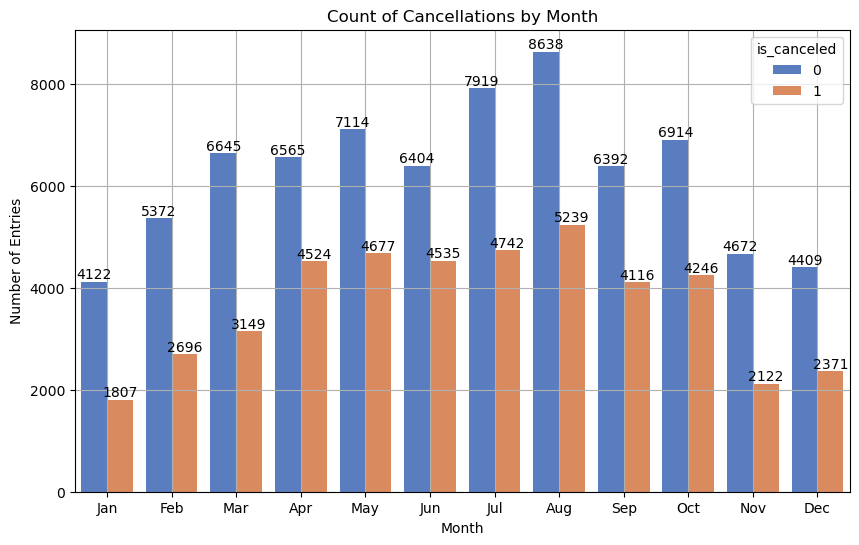

In [87]:

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', palette='muted')

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)

# Set the plot title and labels
plt.title('Count of Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)

# Show the plot
plt.show()


### `observation:-`
> Top 4 months with highest bookings without cancelation

* **`August`** - **8638**
* **`July`** - **7919**
* **`May`** - **7114**
* **`October`** - **6914**

### ------------------------------`Distribution of stays across different hotel types.`---------------------------------------

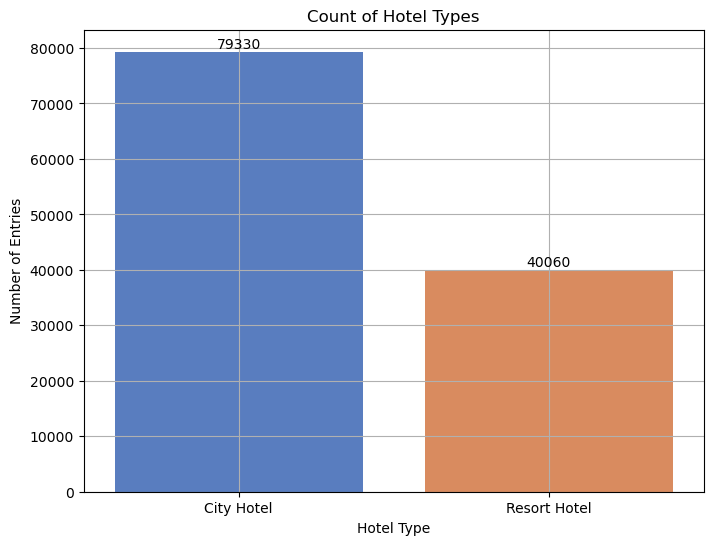

In [88]:

# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Resort Hotel', palette='muted')

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)

# Set x-axis labels with descriptive text
ax.set_xticklabels(['City Hotel', 'Resort Hotel'])

# Set the plot title and labels
plt.title('Count of Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Entries')
plt.grid(True)

# Show the plot
plt.show()


### `Observation:-`
This plot shows that the most hotel bookings were of `"City Hotel"` type.
* **`City Hotel`** - **79330** bookings
* **`Resort Hotel`** - **40060** bookings

### ------------------------------------------`Average daily rate (ADR) trends`------------------------------------------------------------

**`Note:-`** To get average daily rate (trends), we will convert numeric months to month names

In [89]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['arrival_date_month_names'] = df['arrival_date_month'].map(month_mapping)

df[['arrival_date_month_names', 'arrival_date_month']].head()

,arrival_date_month_names,arrival_date_month
0,August,8
1,July,7
2,July,7
3,July,7
4,July,7


In [90]:
# Convert 'arrival_date_month' to a datetime format for better plotting
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month_names'] + '-01')

# Calculate the average ADR trends overtime
monthly_adr = df.groupby('arrival_date')['adr'].mean().reset_index()

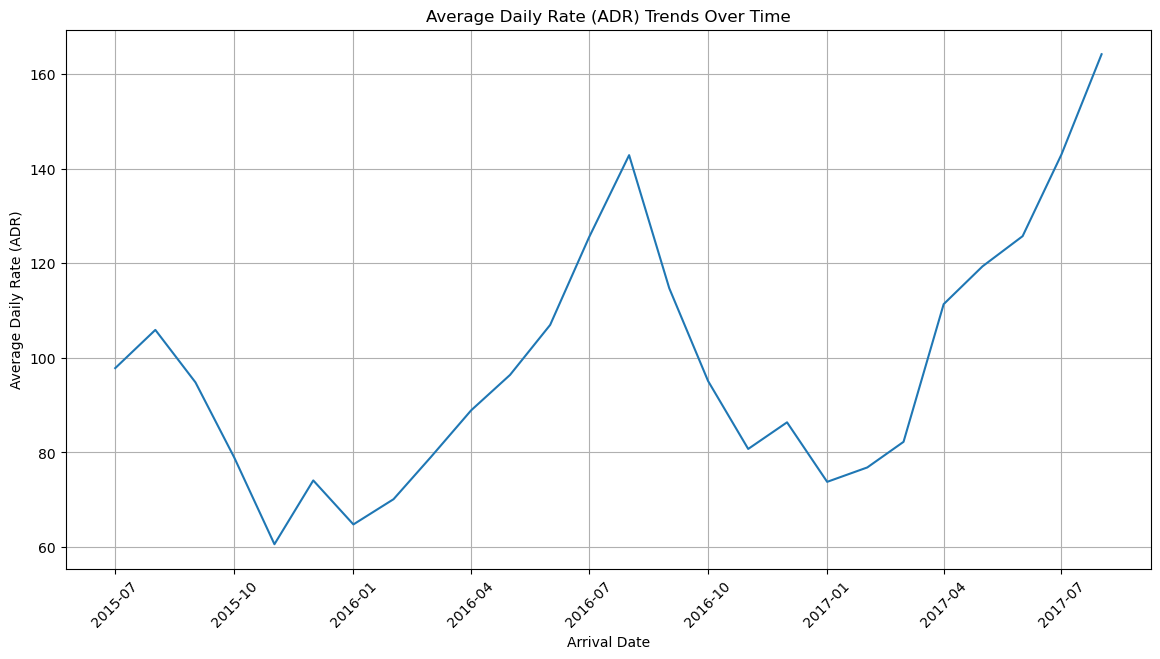

In [91]:
plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_adr, x='arrival_date', y='adr')
plt.title('Average Daily Rate (ADR) Trends Over Time')
plt.xlabel('Arrival Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### `Observations:-`
* This line-plot shows the ADR spikes from **`"January"`** (07) to **`"August"`** (08) of every year.
* The ADR dips is seen on every from **`"August"`** (09)to **`"November"`** (11) of each year.
* The Highest ADR recorded was on **`"2017-07"`** (July 2017)
* The Lowest ADR recorded was on **`"2015-11"`** (November 2015)

### -------------------------`Cancellation rates and factors affecting cancellations`-----------------------------

#### **`Cancellation rate`**

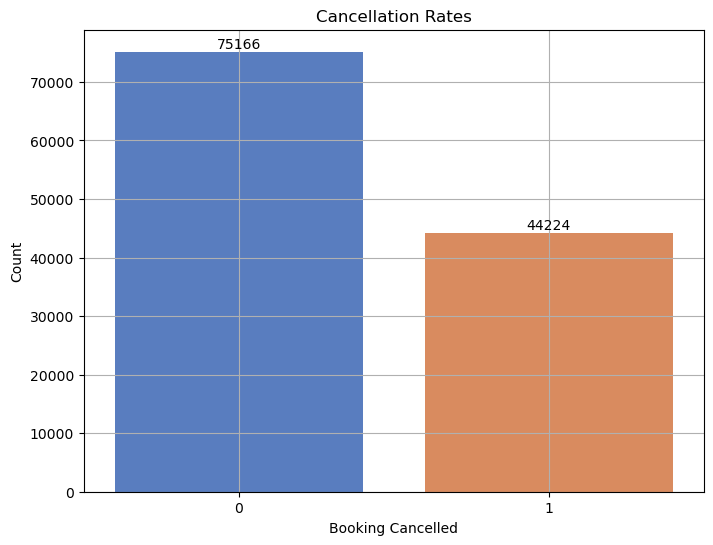

In [92]:

# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='is_canceled', palette='muted')

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)



# Set the plot title and labels
plt.title('Cancellation Rates')
plt.xlabel('Booking Cancelled')
plt.ylabel('Count')
plt.grid(True)

# Show the plot
plt.show()

### `Observations:-`
* This plot shows that the **`44224`** bookings were cancelled out of **`119390`**.

In [94]:
df.iloc[:, 1:-2]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assign_room_type_encoded,type_No Deposit,type_Non Refund,cust_type_Contract,cust_type_Transient,cust_type_Transient-Party,res_status_Canceled,res_status_Check-Out,year_2015,year_2016
0,1,300,2015,8,33,13,0,2,2,0.0,...,1,1,0,0,0,1,1,0,1,0
1,1,286,2015,7,31,30,0,2,2,0.0,...,1,1,0,0,0,1,1,0,1,0
2,1,286,2015,7,31,30,0,2,2,0.0,...,1,1,0,0,0,1,1,0,1,0
3,1,286,2015,7,31,30,0,2,2,0.0,...,1,1,0,0,0,1,1,0,1,0
4,1,286,2015,7,31,30,0,2,2,0.0,...,1,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,169,2017,8,35,30,2,9,2,0.0,...,5,1,0,0,0,1,0,1,0,0
119386,0,269,2017,8,34,24,4,13,2,0.0,...,4,1,0,1,0,0,0,1,0,0
119387,0,204,2017,8,35,29,4,10,2,0.0,...,5,1,0,0,1,0,0,1,0,0
119388,0,211,2017,8,35,31,4,10,2,0.0,...,4,1,0,1,0,0,0,1,0,0


In [95]:
df['res_status_Canceled'].value_counts()

res_status_Canceled
0    76373
1    43017
Name: count, dtype: int64

In [96]:
df['type_Non Refund'].value_counts()

type_Non Refund
0    104803
1     14587
Name: count, dtype: int64

In [97]:
corr_mat = df.iloc[:, 1:-2].corr()
corr_mat['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
res_status_Canceled               0.978435
type_Non Refund                   0.481457
lead_time                         0.293123
country_encoded                   0.271231
distrib_chnl_TA/TO                0.175944
cust_type_Transient               0.133084
previous_cancellations            0.110133
adults                            0.060017
market_segment_encoded            0.059338
days_in_waiting_list              0.054186
adr                               0.047557
meal_FB                           0.038828
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
meal_BB                           0.013124
arrival_date_month                0.011022
arrival_date_week_number          0.008148
children                          0.005036
meal_SC                           0.001282
year_2015                        -0.000254
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
distrib_chn

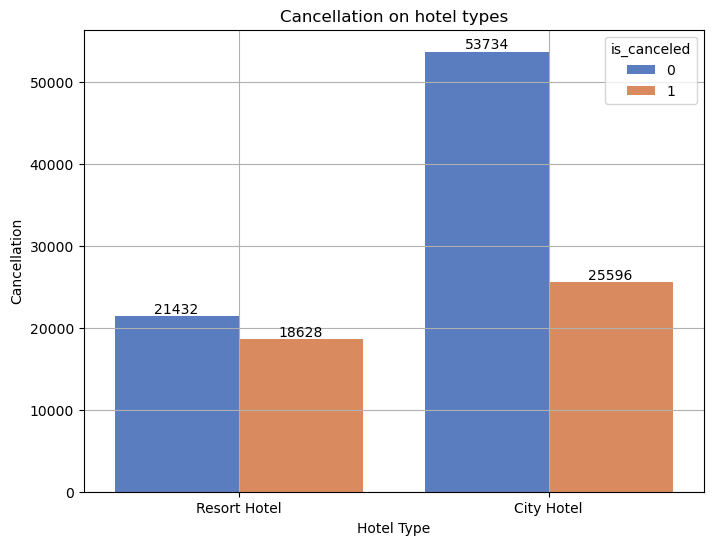

In [98]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=df_categorical['hotel'], hue='is_canceled', palette='muted')

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)


# Set the plot title and labels
plt.title('Cancellation on hotel types')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation')
plt.grid(True)

# Show the plot
plt.show()

# sns.countplot(data=df, x=df_categorical['hotel'], hue='is_canceled')

### `Observations:-`
* This plot shows that most of the bookings were of **`"City Hotel"`**.
* Since **`"Resort Hotel"`** has less bookings as compared to **`"City Hotel"`**. But the **`cancellation rate`** is higher as compared to **`"Resort Hotel"`**.

In [99]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  object
 1   arrival_date_month    119390 non-null  object
 2   meal                  119390 non-null  object
 3   country               118902 non-null  object
 4   market_segment        119390 non-null  object
 5   distribution_channel  119390 non-null  object
 6   reserved_room_type    119390 non-null  object
 7   assigned_room_type    119390 non-null  object
 8   deposit_type          119390 non-null  object
 9   customer_type         119390 non-null  object
 10  reservation_status    119390 non-null  object
dtypes: object(11)
memory usage: 10.0+ MB


In [100]:
df['country_encoded'].value_counts()

country_encoded
10    48590
9     18590
5     12129
4     10415
3      8568
2      7287
7      3766
6      3375
0      2342
1      2224
8      2104
Name: count, dtype: int64

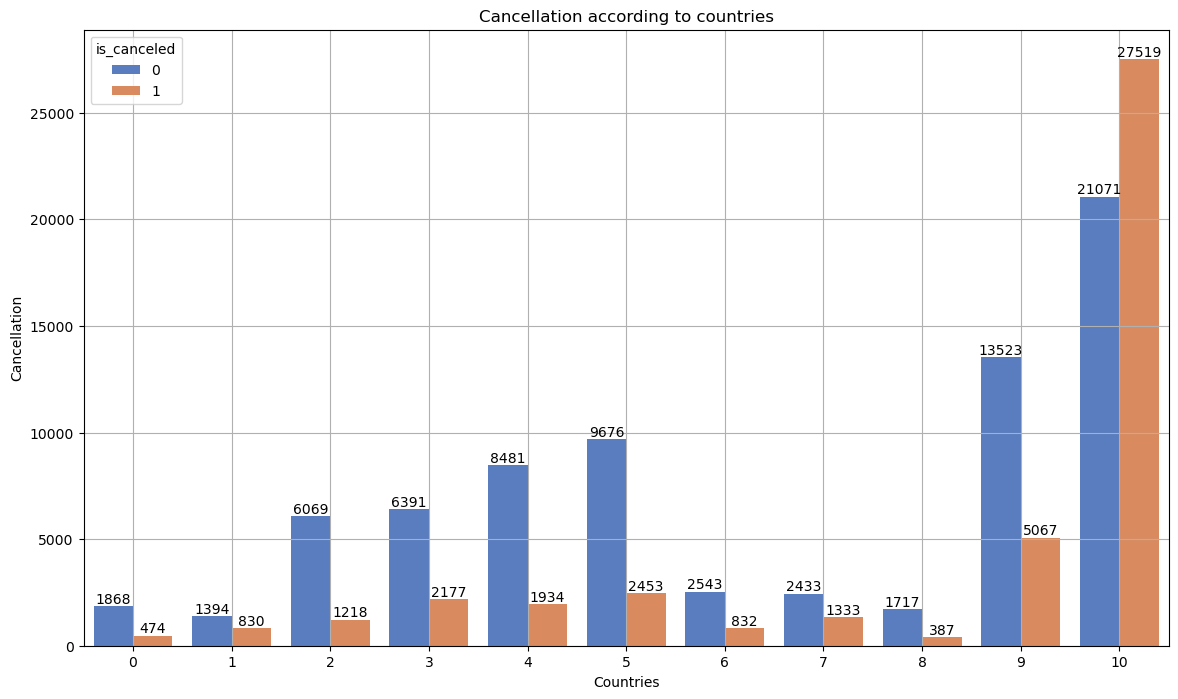

In [101]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df, x='country_encoded', hue='is_canceled', palette='muted')

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)


# Set the plot title and labels
plt.title('Cancellation according to countries')
plt.xlabel('Countries')
plt.ylabel('Cancellation')
plt.grid(True)

# Show the plot
plt.show()


### `Labels for the countries:`

| Country | Label |
|---------|-------|
| BEL     | 0     |
| BRA     | 1     |
| DEU     | 2     |
| ESP     | 3     |
| FRA     | 4     |
| GBR     | 5     |
| IRL     | 6     |
| ITA     | 7     |
| NLD     | 8     |
| Others  | 9     |
| PRT     | 10    |

-------------------------------------------------------------------------------
### **`Observations:-`**
* The most of the bookings were from country code **`"PRT" (Portugal)`**.
* **`"PRT" (Portugal)`** is the only country which has **`higher amount of cancellations` (27519)** even higher that **`non-cancellations` (21071)**.
* Rest of the country has lower rate of `cancellations`.

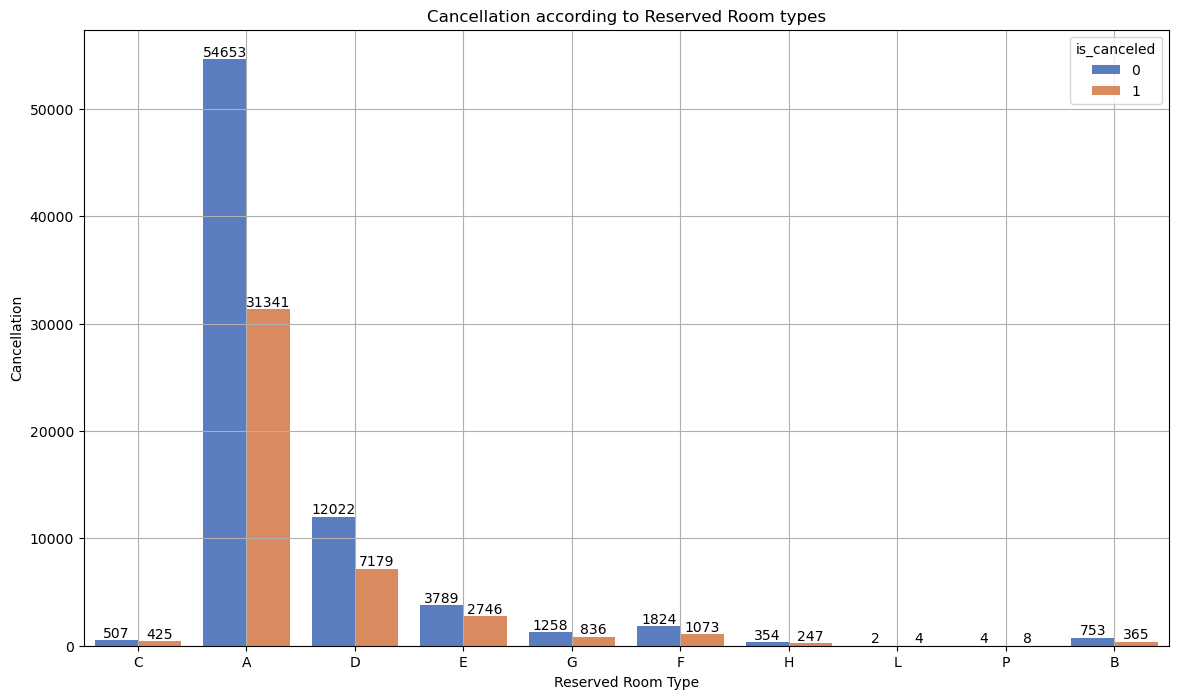

In [102]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df, x=df_categorical['reserved_room_type'], hue='is_canceled', palette='muted')

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)


# Set the plot title and labels
plt.title('Cancellation according to Reserved Room types')
plt.xlabel('Reserved Room Type')
plt.ylabel('Cancellation')
plt.grid(True)

# Show the plot
plt.show()


### **`Observations:-`**
* The most of the bookings were from **`reserved room type (A)`**.
* The most cancellation were also from **`reserved room type (A)` (31341 out of 85994)**.

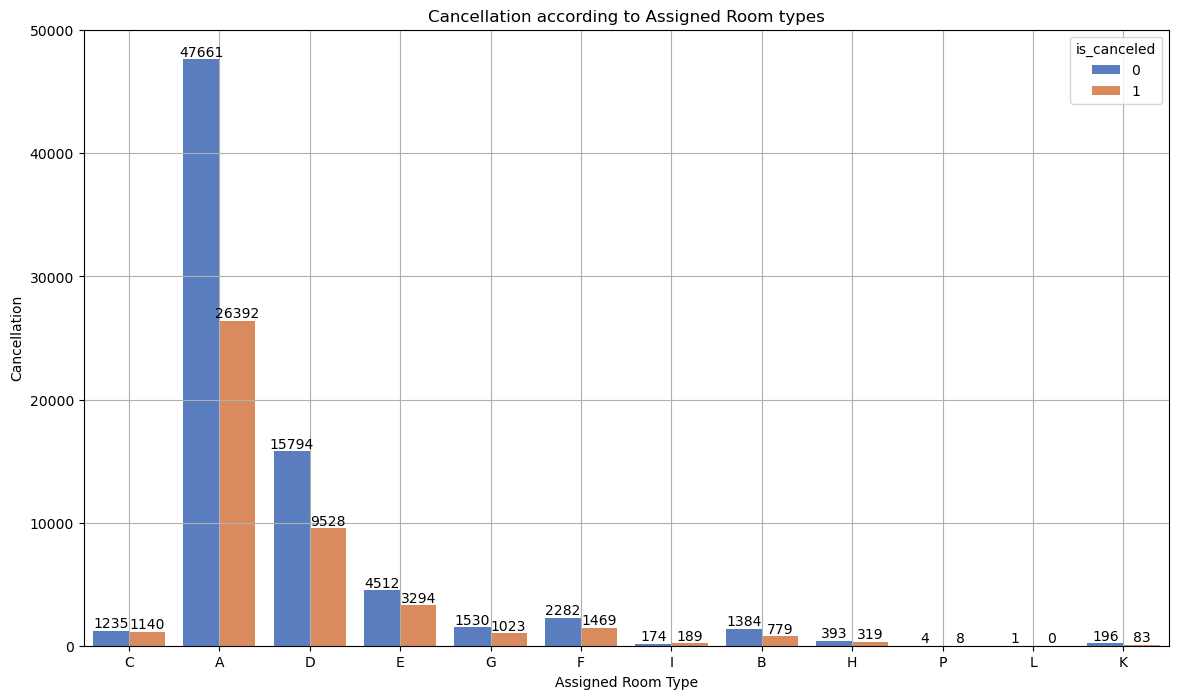

In [103]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(data=df, x=df_categorical['assigned_room_type'], hue='is_canceled', palette='muted')

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)


# Set the plot title and labels
plt.title('Cancellation according to Assigned Room types')
plt.xlabel('Assigned Room Type')
plt.ylabel('Cancellation')
plt.grid(True)

# Show the plot
plt.show()


### **`Observations:-`**
* The most of the bookings were from **`assigned room type (A)`**.
* The most cancellation were also from **`assigned room type (A)` (26392 out of 74053)**.

# 3. Hypothesis Testing

* Formulate and test at least two hypotheses related to the data. For example:
    * "Customers booking more than 6 months in advance are more likely to cancel."
    * "Weekday bookings have a higher average daily rate than weekend bookings."
* Use appropriate statistical tests to validate these hypotheses.

### -----------`"Customers booking more than 6 months in advance are more likely to cancel."`----------------

In [104]:
print(df_categorical['reserved_room_type'].value_counts())
print(df_categorical['reservation_status'].value_counts())

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64
reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64


In [105]:
df['arrival_date_month']

0         8
1         7
2         7
3         7
4         7
         ..
119385    8
119386    8
119387    8
119388    8
119389    8
Name: arrival_date_month, Length: 119390, dtype: int64

In [106]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   hotel                 119390 non-null  object
 1   arrival_date_month    119390 non-null  object
 2   meal                  119390 non-null  object
 3   country               118902 non-null  object
 4   market_segment        119390 non-null  object
 5   distribution_channel  119390 non-null  object
 6   reserved_room_type    119390 non-null  object
 7   assigned_room_type    119390 non-null  object
 8   deposit_type          119390 non-null  object
 9   customer_type         119390 non-null  object
 10  reservation_status    119390 non-null  object
dtypes: object(11)
memory usage: 10.0+ MB


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   reservation_status_date         119390 non-null  datetime64[ns]
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

In [108]:
df['6_months_advance_booking'] = df['lead_time']>180

<Axes: xlabel='6_months_advance_booking', ylabel='count'>

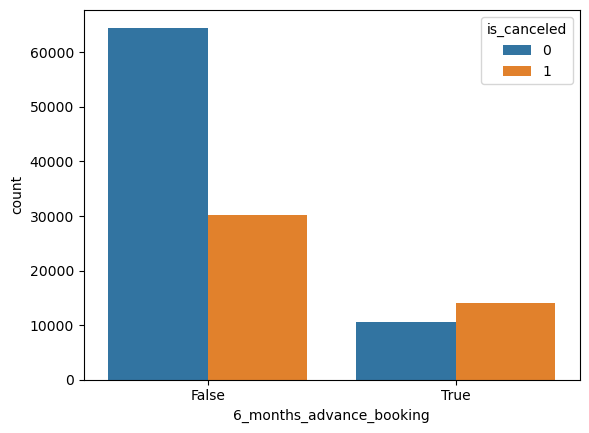

In [109]:
sns.countplot(data=df, x='6_months_advance_booking', hue='is_canceled')

### `Observations:-`
* As we can see in the above plot, the **`"cancellations rate"`** in **`"6 months advance booking"`** is higher than the **`"non cancellations rate"`** as compared to the cancellations of **`"bookings before 6 months"`**.


#### `Conclusion:-`
 This proved that the hypothesis is **`TRUE`**

### -----------`"Weekday bookings have a higher average daily rate than weekend bookings."`----------------

* To test the hypothesis that "Weekday bookings have a higher average daily rate than weekend bookings," we need to:

    * Define Weekday and Weekend Bookings: Identify which days are considered weekdays and which are weekends. Typically, weekdays are Monday through Friday, and weekends are Saturday and Sunday.
    * Calculate the Average Daily Rate (ADR): Compute the ADR for bookings that are primarily for weekdays versus those primarily for weekends.

**`Note:-`**
Now, we will get `ADR` according to `weekdays` and `weekends`.

In [110]:
df['booking_type'] = df.apply(lambda x: 'Weekdays' if x['stays_in_week_nights'] > x['stays_in_weekend_nights'] else 'Weekends', axis=1)

adr_booking_type = df.groupby('booking_type')['adr'].mean()
adr_booking_type

booking_type
Weekdays    103.167653
Weekends     97.519810
Name: adr, dtype: float64

### `Observations:-`
* This shows that `weekdays` bookings have `higher ADR` as compared to `weekends`.

### **`Note:-`** Now we will analyse it further using `t-test`

In [111]:
from scipy.stats import ttest_ind

weekend_adr = df[df['booking_type']=='Weekends']['adr']
weekday_adr = df[df['booking_type']=='Weekdays']['adr']

t_stats, p_value = ttest_ind(weekday_adr, weekend_adr, equal_var=False)
t_stats, p_value

(17.366420731800837, 2.3038558112105565e-67)

#### `The t-test results are as follows:`

* t-statistic: 17.37
* p-value: 2.30e-67 (basically 0)

### `Observations:-`
* Since the P-value is less than `0.05`. Therefore, we can reject the null hypothesis.
* This supports the hypothesis that `"Weekday bookings have a higher average daily rate than weekend bookings."`

# 4. Predictive Modeling

* Build a predictive model to forecast hotel cancellations. Include the following steps:
    * Select appropriate features.
    * Split the data into training and test sets.
    * Train at least two different models (e.g., Logistic Regression, Random Forest).
    * Evaluate model performance using relevant metrics (accuracy, precision, recall, F1-score).
    * Discuss any improvements you would recommend for the model.

In [112]:
df.drop('arrival_date_month_names', axis=1, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   reservation_status_date         119390 non-null  datetime64[ns]
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

#### `Now, finding the correlations of column "is_canceled" with other columns to get the columns with high correlations.`

In [114]:
corr_mat = df.iloc[:, :-1].corr()
corr_mat['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
res_status_Canceled               0.978435
type_Non Refund                   0.481457
lead_time                         0.293123
country_encoded                   0.271231
6_months_advance_booking          0.211148
distrib_chnl_TA/TO                0.175944
cust_type_Transient               0.133084
previous_cancellations            0.110133
adults                            0.060017
market_segment_encoded            0.059338
days_in_waiting_list              0.054186
adr                               0.047557
meal_FB                           0.038828
stays_in_week_nights              0.024765
arrival_date                      0.023826
arrival_date_year                 0.016660
meal_BB                           0.013124
arrival_date_month                0.011022
arrival_date_week_number          0.008148
children                          0.005036
meal_SC                           0.001282
year_2015                        -0.000254
stays_in_we

### `Observations:-`
Given below are the features that we will be taking while training the model because of the high correlations:
* res_status_Canceled           -    `0.978435`
* type_Non Refund               -    `0.481457`
* lead_time                     -    `0.293123`
* country_encoded               -    `0.271231`
* 6_months_advance_booking      -    `0.211148`
* distrib_chnl_TA/TO            -    `0.175944`
* cust_type_Transient           -    `0.133084`
* booking_changes               -   `-0.144381`
* distrib_chnl_Direct           -   `-0.151620`
* reservation_status_date       -   `-0.165057`
* assign_room_type_encoded      -   `-0.176028`
* required_car_parking_spaces   -   `-0.195498`
* total_of_special_requests     -   `-0.234658`
* type_No Deposit               -   `-0.477911`
* res_status_Check-Out          -   `-1.000000`

In [132]:
selected_features = ['reservation_status_date',
    'res_status_Canceled', 
    'type_Non Refund', 
    'lead_time', 
    'country_encoded',
    'distrib_chnl_TA/TO', 
    'cust_type_Transient', 
    'booking_changes', 
    'distrib_chnl_Direct', 
    'assign_room_type_encoded', 
    'required_car_parking_spaces', 
    'total_of_special_requests', 
    'type_No Deposit', 
    'res_status_Check-Out',
    'is_canceled'
]

In [133]:
df_for_model = df[selected_features]

In [134]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   reservation_status_date      119390 non-null  datetime64[ns]
 1   res_status_Canceled          119390 non-null  int32         
 2   type_Non Refund              119390 non-null  int32         
 3   lead_time                    119390 non-null  int64         
 4   country_encoded              119390 non-null  int32         
 5   distrib_chnl_TA/TO           119390 non-null  int32         
 6   cust_type_Transient          119390 non-null  int32         
 7   booking_changes              119390 non-null  int64         
 8   distrib_chnl_Direct          119390 non-null  int32         
 9   assign_room_type_encoded     119390 non-null  int64         
 10  required_car_parking_spaces  119390 non-null  int64         
 11  total_of_special_requests 

### Training the model using `Random Forest Classifier`

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score



# Create lag features (e.g., lag 1, lag 2, lag 3)
df_for_model['lag_1'] = df_for_model['is_canceled'].shift(1)
df_for_model['lag_2'] = df_for_model['is_canceled'].shift(2)
df_for_model['lag_3'] = df_for_model['is_canceled'].shift(3)

df_for_model.dropna(inplace=True)
# Features and target variable
features = ['lag_1', 'lag_2', 'lag_3']
X = df_for_model[features]
y = df_for_model['is_canceled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nAccuracy:", accuracy)


C:\Users\User\AppData\Local\Temp\ipykernel_10952\2121981644.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['lag_1'] = df_for_model['is_canceled'].shift(1)
C:\Users\User\AppData\Local\Temp\ipykernel_10952\2121981644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['lag_2'] = df_for_model['is_canceled'].shift(2)
C:\Users\User\AppData\Local\Temp\ipykernel_10952\2121981644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Confusion Matrix:
 [[16993  1361]
 [ 3186  2337]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     18354
           1       0.63      0.42      0.51      5523

    accuracy                           0.81     23877
   macro avg       0.74      0.67      0.69     23877
weighted avg       0.79      0.81      0.80     23877


ROC AUC Score: 0.7616414322615062

Accuracy: 0.8095656908321816


Based on the results from your Random Forest Classifier model, here’s a summary of the key evaluation metrics:

### 1. **Accuracy**
- **Value:** 0.81 (or 81%)
- **Explanation:** In this case, the model correctly predicted whether a booking would be canceled or not 81% of the time.

### 2. **Precision**
- **Class 0 (Not Canceled):** 0.84
- **Class 1 (Canceled):** 0.63
- **Explanation:** A high precision for Class 0 means that when the model predicts a booking will not be canceled, it is correct 84% of the time. For Class 1, the model is correct 63% of the time when it predicts a cancellation. This indicates that the model has more confidence in predicting non-cancellations than cancellations.

### 3. **Recall (Sensitivity)**
- **Class 0 (Not Canceled):** 0.93
- **Class 1 (Canceled):** 0.42
- **Explanation:** For Class 0, the recall is 0.93, meaning the model successfully identified 93% of the actual non-cancelled bookings. For Class 1, the recall is much lower at 0.42, indicating the model only correctly identified 42% of the actual canceled bookings.

### 4. **F1-Score**
- **Class 0 (Not Canceled):** 0.88
- **Class 1 (Canceled):** 0.51
- **Explanation:** For Class 0, the F1-score is 0.88, showing a good balance between high precision and high recall. For Class 1, the F1-score is 0.51, indicating that while the model has reasonable precision, its lower recall for cancellations affects the overall balance.

### 5. **ROC AUC Score**
- **Value:** 0.76
- **Explanation:** A score of 0.76 indicates that the model has a moderate ability to differentiate between canceled and non-canceled bookings. A score closer to 1 would indicate excellent discrimination, while a score around 0.5 suggests no better performance than random guessing.

### **Overall Summary**
The Random Forest model has demonstrated a solid performance in predicting non-cancellations (Class 0) with high precision, recall, and F1-score. However, its performance is notably lower for predicting cancellations (Class 1), with lower precision, recall, and F1-score. The model tends to miss a significant number of actual cancellations, as indicated by the recall for Class 1 (0.42). Improving the recall for canceled bookings could be an area of focus for enhancing the model's overall effectiveness.

### Training the model using `Artificial Neural Network (ANN)`

In [159]:
import tensorflow as tf

Epoch 1/25


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2388/2388 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7828 - loss: 0.4918 - val_accuracy: 0.7463 - val_loss: 0.5368
Epoch 2/25
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7825 - loss: 0.4860 - val_accuracy: 0.7463 - val_loss: 0.5351
Epoch 3/25
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7879 - loss: 0.4813 - val_accuracy: 0.7463 - val_loss: 0.5454
Epoch 4/25
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7876 - loss: 0.4780 - val_accuracy: 0.7463 - val_loss: 0.5333
Epoch 5/25
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7871 - loss: 0.4806 - val_accuracy: 0.7463 - val_loss: 0.5366
Epoch 6/25
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7869 - loss: 0.4827 - val_accuracy: 0.7463 - val_loss: 0.5353
Epoch 7/25
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7858 - loss: 0.4823 - val_accuracy: 0.7463 - val_loss: 0.5335
Epoch 8/25
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7882 - loss: 0.4804 - val_accurac

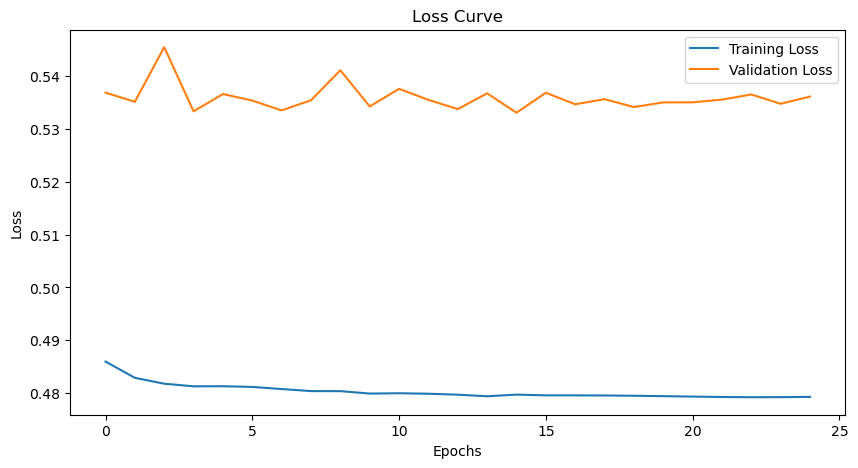

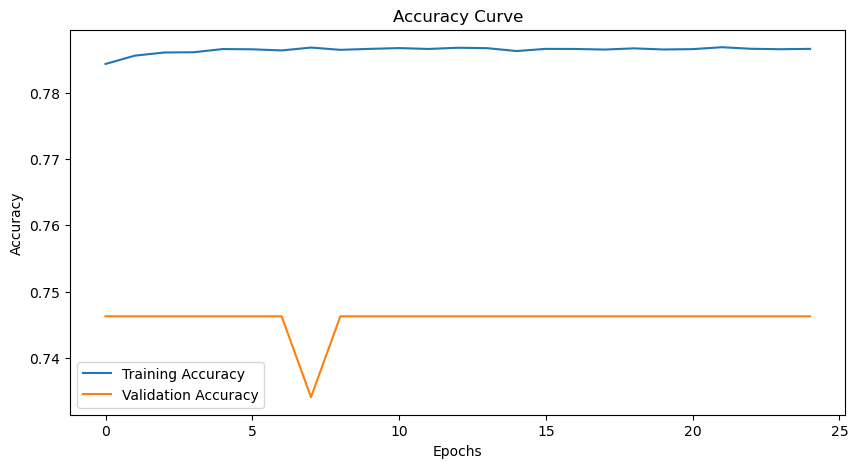

In [165]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building an ANN
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2)


# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nAccuracy:", accuracy)

# Plotting the loss curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Summary of Model Performance

**1. Confusion Matrix:**
- **True Negatives (TN):** 16,993 - These are correctly predicted non-cancellations.
- **False Positives (FP):** 1,361 - These are bookings that were predicted as canceled but were not actually canceled.
- **False Negatives (FN):** 3,186 - These are bookings that were not predicted as canceled but were actually canceled.
- **True Positives (TP):** 2,337 - These are correctly predicted cancellations.

**2. Accuracy:**  
- **Value:** 0.81 (or 81%)
- **Explanation:** This represents the proportion of correctly predicted instances (both cancellations and non-cancellations) out of the total predictions. The model is correct 81% of the time, which indicates good overall performance.

**3. Precision:**
- **Class 0 (Not Canceled):** 0.84
- **Class 1 (Canceled):** 0.63
- **Explanation:** Precision measures the accuracy of positive predictions. For Class 0, when the model predicts a booking will not be canceled, it is correct 84% of the time. For Class 1, when the model predicts a booking will be canceled, it is correct 63% of the time. This shows that the model is more confident in predicting non-cancellations.

**4. Recall (Sensitivity):**
- **Class 0 (Not Canceled):** 0.93
- **Class 1 (Canceled):** 0.42
- **Explanation:** Recall measures how well the model identifies actual positive cases. For Class 0, the recall is 0.93, meaning the model correctly identifies 93% of actual non-cancellations. For Class 1, the recall is 0.42, indicating the model correctly identifies 42% of actual cancellations. The lower recall for cancellations suggests the model misses a significant number of actual cancellations.

**5. F1-Score:**
- **Class 0 (Not Canceled):** 0.88
- **Class 1 (Canceled):** 0.51
- **Explanation:** The F1-score is the harmonic mean of precision and recall. It provides a balance between the two. For Class 0, the F1-score is 0.88, indicating a strong performance in predicting non-cancellations. For Class 1, the F1-score is 0.51, reflecting a lower ability to predict cancellations accurately.

**6. ROC AUC Score:**
- **Value:** 0.76
- **Explanation:** The ROC AUC score measures the model's ability to distinguish between the two classes (canceled and not canceled). A score of 0.76 indicates a moderate ability to differentiate between the classes. A perfect model would have a score of 1.0, while a score of 0.5 indicates no discriminatory power (equivalent to random guessing).

### **Overall Summary:**

* The ANN model demonstrates good performance in predicting non-cancelled bookings, with high accuracy, precision, recall, and F1-score for Class 0 (Not Canceled). 
* However, the model has a relatively lower performance in predicting cancellations (Class 1). It has a moderate precision for cancellations but a low recall, indicating it misses many actual cancellations. 

### `Discuss any improvements you would recommend for the model.`

### Summary of Recommendations for Model Improvement

1. **Address Class Imbalance:**
   - **Resampling Techniques:** Use oversampling (e.g., SMOTE) or undersampling to balance the dataset.
   - **Class Weight Adjustment:** Increase the importance of the minority class in the loss function.

2. **Improve Feature-Dependent Variable Correlation:**
   - **Feature Engineering:** Enhance or create new features to better capture relationships with the dependent variable.
   - **Feature Selection:** Identify and use the most relevant features to improve model performance.

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   reservation_status_date         119390 non-null  datetime64[ns]
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

# 5. Operational Insights:
* Provide actionable insights and recommendations for hotel management based on your analysis. Consider aspects like pricing strategies, customer segmentation, and marketing focus.

<Axes: xlabel='market_segment', ylabel='count'>

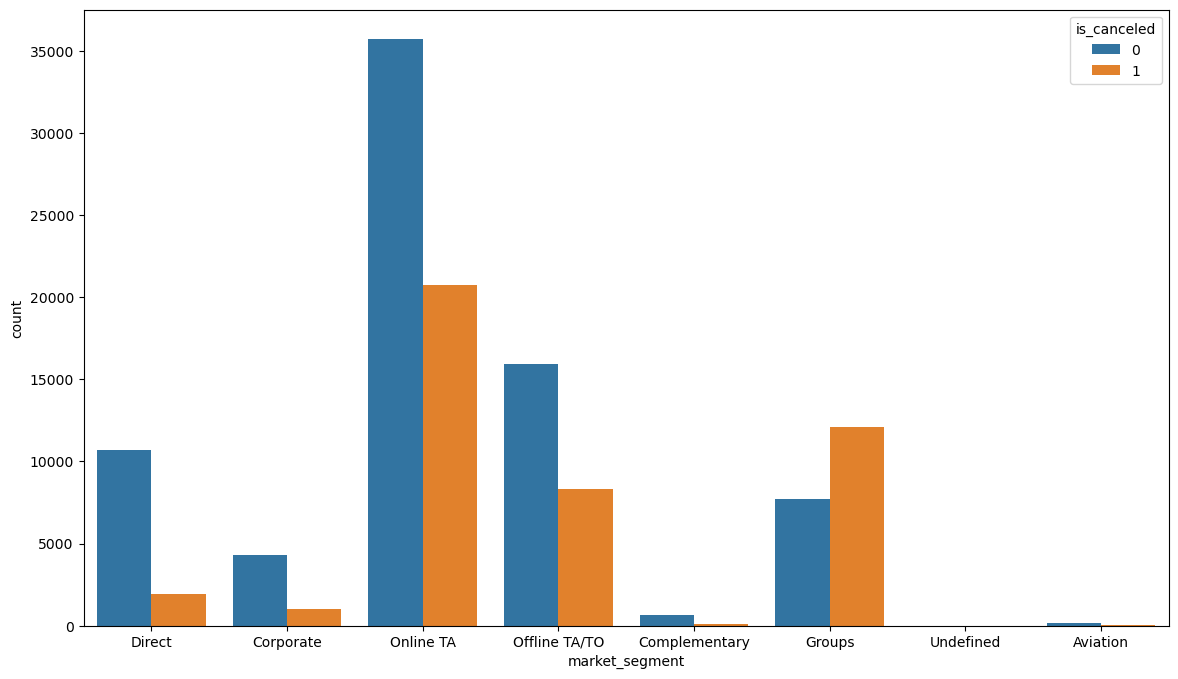

In [170]:
plt.figure(figsize=(14,8))
sns.countplot(data=df_clone, x='market_segment', hue='is_canceled')

### `Recommendations for Hotel Management`
* The hotel in country PRT (Portugal) should focus more on their management because of the highest number of hotel cancellations compared to its own non-cancellations.
* The management of `Resort type hotel` should focus more on their bookings as it has comparatively less bookings than the `City type hotels`.
* Reserved room and Assigned room types has highest bookings only on `Room Type A` meaning there is a room for improvement on other room types.

**Note:-**
* `The customer is more likely to cancel the bookings if the booking is done in 6 months advance or more than that. That can be prevented by giving special offer on advance booking that attracts customers.`